In [1]:
# Cell 1: Explanation and Importing Libraries

"""
Experiment Explanation:

Objective: Conduct an experiment to observe the behavior of K-Means clustering with different numbers of clusters 
(k) ranging from 5 to 30. The clustering will be applied to a dataset of keywords, and the resulting clusters will 
be analyzed in terms of their size (number of keywords). The results will be visualized in a 3D plot, where:
- X-axis represents each cluster number within a given k.
- Y-axis represents the number of keywords in a cluster.
- Z-axis (or color/size in 2D visualization) represents the total number of clusters (k) in that iteration.

Approach:
- Preprocess the keyword data.
- Iteratively apply K-Means clustering with k from 5 to 30.
- Record the size of each cluster.
- Visualize the results in a 3D plot.
"""

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Cell 2: Load and Preprocess Data

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Ensure the necessary nltk data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load Data
# Assuming a CSV file with a column named 'Search term' that contains the keywords
file_path = 'Search_terms_report_mini.csv'  # Update with your file path
data = pd.read_csv(file_path, encoding="utf-16", delimiter="\t", quotechar='"', skiprows=2, low_memory=False)


# Basic Text Preprocessing
def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Removing numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization (splitting text into words)
    words = text.split()
    # Removing stopwords
    words = [w for w in words if w not in stopwords.words('spanish')]
    # Lemmatization (reducing words to their root form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    # Joining words back into a string
    return ' '.join(words)

# Apply preprocessing to the 'Search term' column
data['processed_term'] = data['Search term'].apply(preprocess)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency
X = vectorizer.fit_transform(data['processed_term'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iroko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\iroko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Cell 3: Iterative Clustering and Data Recording

# DataFrame to store the results for plotting
plot_data = pd.DataFrame(columns=['Num_of_Clusters', 'Cluster_Number', 'Keyword_Count'])

# Iterative clustering
for k in range(5, 31):  # Clustering from k=5 to k=30
    kmeans = KMeans(n_clusters=k).fit(X)  # Assuming X is your pre-processed data
    
    # Storing results
    temp_df = pd.DataFrame()
    temp_df['Cluster'] = kmeans.labels_
    cluster_counts = temp_df['Cluster'].value_counts().reset_index()
    cluster_counts.columns = ['Cluster_Number', 'Keyword_Count']
    cluster_counts['Num_of_Clusters'] = k
    
    # Appending to the main DataFrame
    plot_data = pd.concat([plot_data, cluster_counts], ignore_index=True)


c:\Users\iroko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iroko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iroko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iroko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

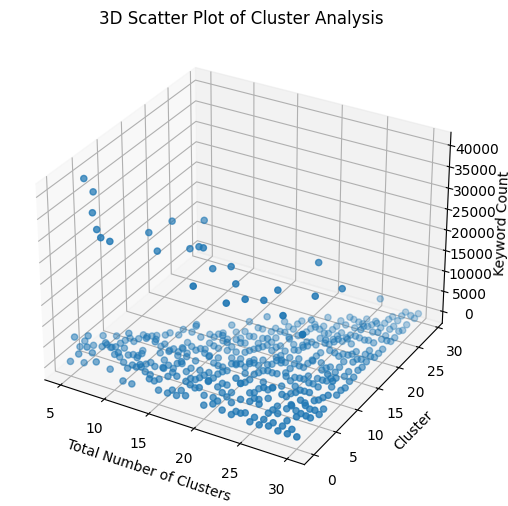

In [4]:
# Cell 4: 3D Visualization

# 3D Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(plot_data['Num_of_Clusters'], plot_data['Cluster_Number'], plot_data['Keyword_Count'])

# Labels and title
ax.set_xlabel('Total Number of Clusters')
ax.set_ylabel('Cluster')
ax.set_zlabel('Keyword Count')
ax.set_title('3D Scatter Plot of Cluster Analysis')

plt.show()
